In [1]:
from baselines.common import plot_util as pu
import matplotlib.pyplot as plt
import numpy as np
import sys

In [4]:

rom matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

SyntaxError: invalid syntax (<ipython-input-4-f4e6364aeb61>, line 2)

In [2]:
v = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.5, 2]

## Cheetah

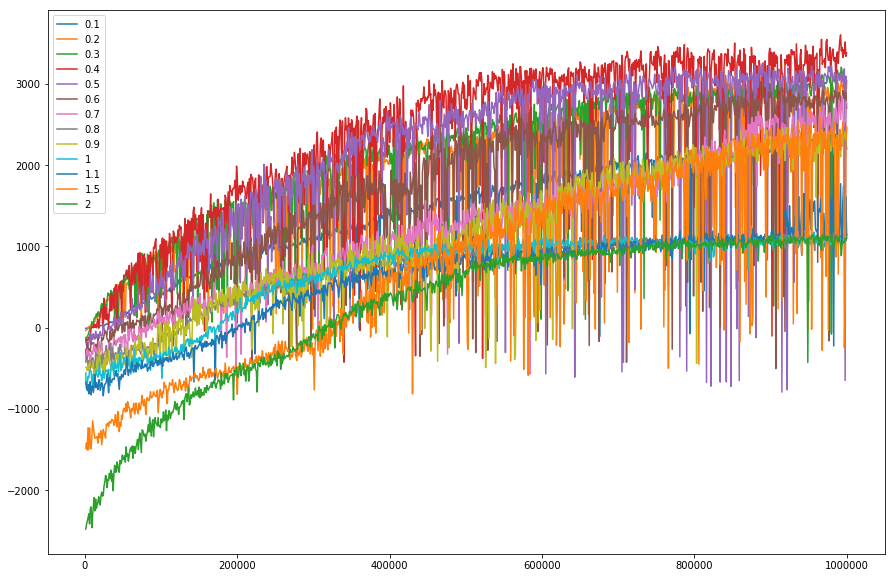

In [8]:
plt.figure(figsize=(15,10))
for var in v:
    results_orig = pu.load_results('logs/Cheetah'+str(var)) 
    r_orig = results_orig[0]
    plt.plot(np.cumsum(r_orig.monitor.l), r_orig.monitor.r, label=str(var))
plt.legend()


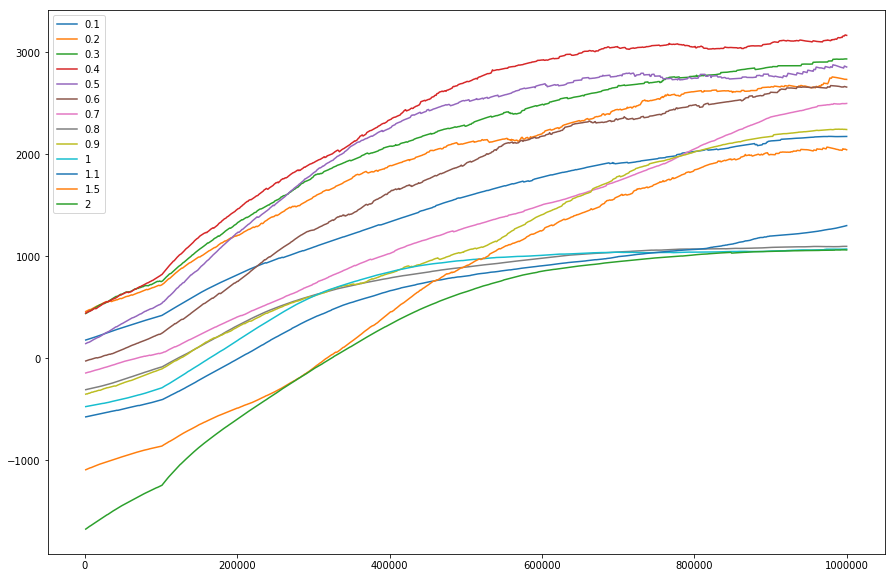

In [14]:
plt.figure(figsize=(15,10))
for var in v:
    results_orig = pu.load_results('logs/Cheetah'+str(var)) 
    r_orig = results_orig[0]
    plt.plot(np.cumsum(r_orig.monitor.l), pu.smooth(r_orig.monitor.r, radius=100), label=str(var))
plt.legend()

## Hopper

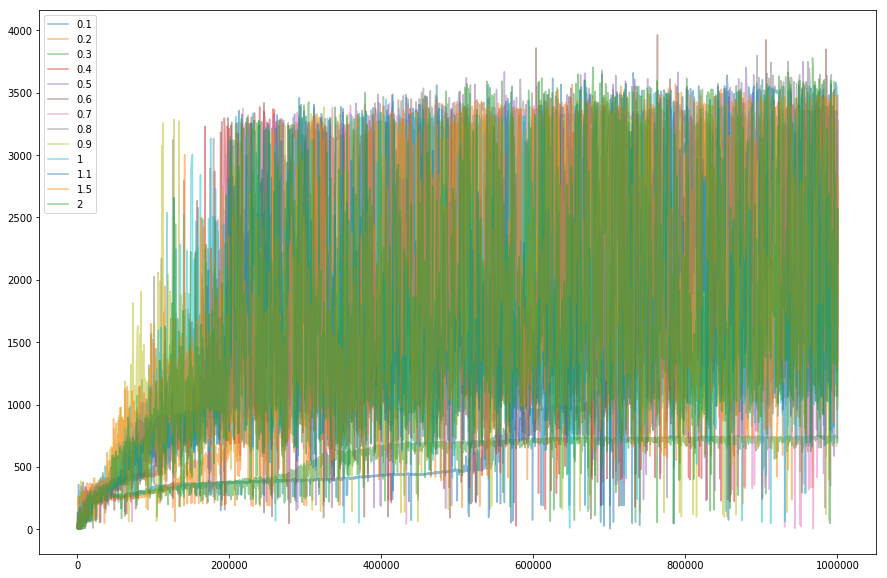

In [16]:
plt.figure(figsize=(15,10))
for var in v:
    results_orig = pu.load_results('logs/hopper'+str(var)) 
    r_orig = results_orig[0]
    plt.plot(np.cumsum(r_orig.monitor.l), r_orig.monitor.r, alpha=.5, label=str(var))
plt.legend()

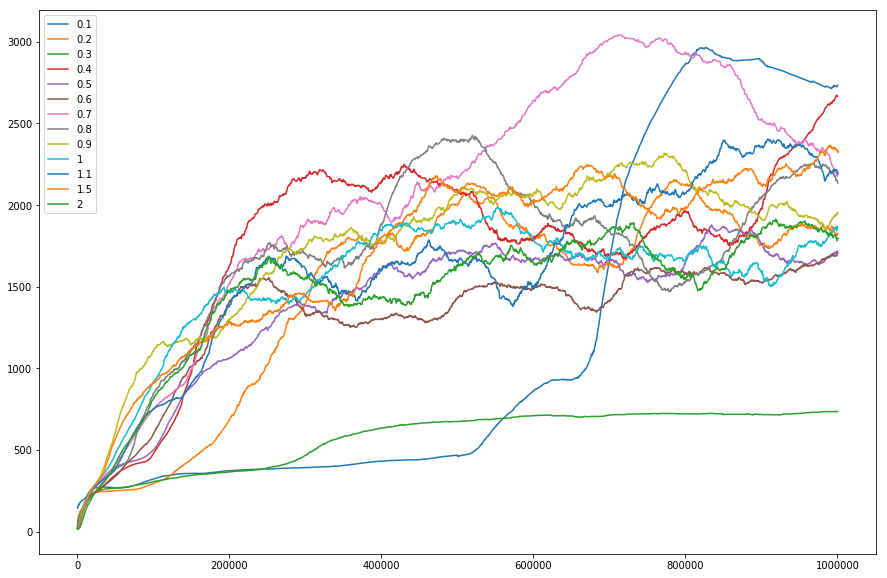

In [13]:
plt.figure(figsize=(15,10))
for var in v:
    results_orig = pu.load_results('logs/hopper'+str(var)) 
    r_orig = results_orig[0]
    plt.plot(np.cumsum(r_orig.monitor.l), pu.smooth(r_orig.monitor.r, radius=100),label=str(var))
plt.legend()